## Summary


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from copy import deepcopy
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline

In [2]:
loc = '/Users/elena/Documents/Kaggle/Allstate/data/'
train = pd.read_csv(os.path.join(loc,'train.csv'))
train.drop('id',axis=1,inplace=True)

test = pd.read_csv(os.path.join(loc,'test.csv'))
ids = test['id']
test.drop('id',axis=1,inplace=True)

submission = pd.read_csv(os.path.join(loc,"sample_submission.csv"))

In [11]:
y = np.log1p(train['loss'].values)
full = pd.concat([train,test],ignore_index=True)
full = full.drop('loss',axis=1)
full.head()

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont13,cont14,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9
0,A,A,B,G,A,A,I,E,G,J,...,0.822493,0.714843,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135
1,A,B,L,F,A,A,E,E,I,K,...,0.611431,0.304496,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127
2,A,B,L,O,A,B,E,F,H,F,...,0.195709,0.774425,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076
3,B,A,I,D,A,A,E,E,I,K,...,0.605077,0.602642,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128
4,A,B,F,J,A,A,D,E,K,G,...,0.246011,0.432606,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089


In [8]:
def convert_strings(pdseries):
    # Function inputs a column of a pandas DataFrame,
    # determines the number of unique entries, and assigns 
    # an integer to each entry. 
    # This is to avoid issues with non-integer data.
      
    array = np.array(pdseries)
    vals = np.unique(array)
    nums = np.arange(0,len(vals),1)
    #new_array = np.zeros(len(array),dtype='int')     
    new_array = np.zeros(len(array),dtype='float')
    
    #nums = np.linspace(0,1,len(vals))
    #new_array = np.zeros(len(array))

    for j in range(len(vals)):
        ind = np.where(array==vals[j])[0]
        new_array[ind]=nums[j]
     
    # Returns a numpy array with an integer for each entry
    return new_array

In [12]:
# Convert to floats:
for col in full.columns:
    if 'cat' in col:
        full.loc[:,col]=convert_strings(full.loc[:,col])

In [15]:
important = list(["cont10","cat1","cat3","cat4","cat9",
                  "cat10","cat12","cat27","cat35","cat37",
                  "cat59","cat66","cat69","cat71","cat79",
                  "cat80","cat81","cat83"])

keepdf = full[important]
keepdf['cont10']=np.log1p(keepdf['cont10'])
keepdf.head()

/Users/elena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cont10,cat1,cat3,cat4,cat9,cat10,cat12,cat27,cat35,cat37,cat59,cat66,cat69,cat71,cat79,cat80,cat81,cat83
0,0.607099,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0
1,0.364080,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0
2,0.281005,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0
3,0.367881,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0
4,0.192519,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0


(4, 11)

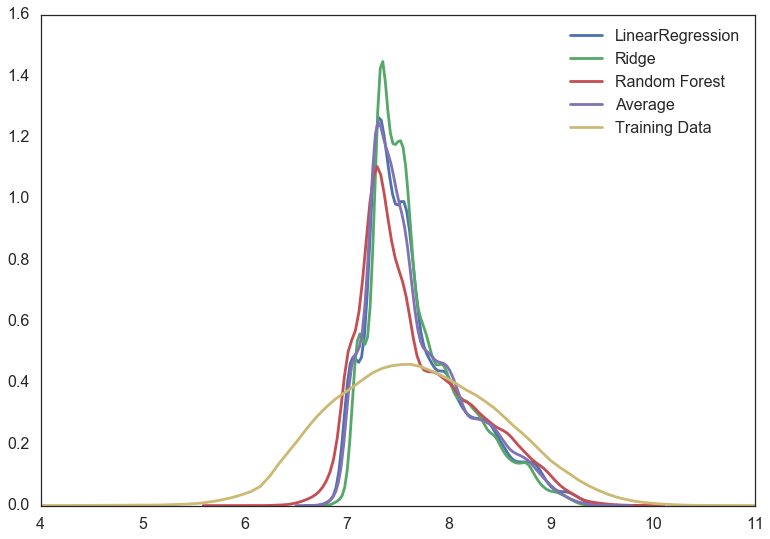

In [24]:
sns.set_context('poster')
sns.set_style('white')

m1 = LinearRegression(normalize=True)
m1.fit(keepdf[0:len(train)],y)
pred1 = m1.predict(keepdf[len(train):])
sns.distplot(pred1,label='LinearRegression',hist=False)

m2 = Ridge(alpha=0.2,normalize=True)
m2.fit(keepdf[0:len(train)],y)
pred2 = m2.predict(keepdf[len(train):])
sns.distplot(pred2,label='Ridge',hist=False)

m3 = RandomForestRegressor(n_estimators=160,min_samples_split=5)
m3.fit(keepdf[0:len(train)],y)
pred3 = m3.predict(keepdf[len(train):])
sns.distplot(pred3,label='Random Forest',hist=False)

sns.distplot(np.mean([pred1,pred2,pred3],axis=0),label='Average',hist=False)

sns.distplot(y,label='Training Data',hist=False)
plt.legend(loc='best')
plt.xlim([4,11])

(4, 11)

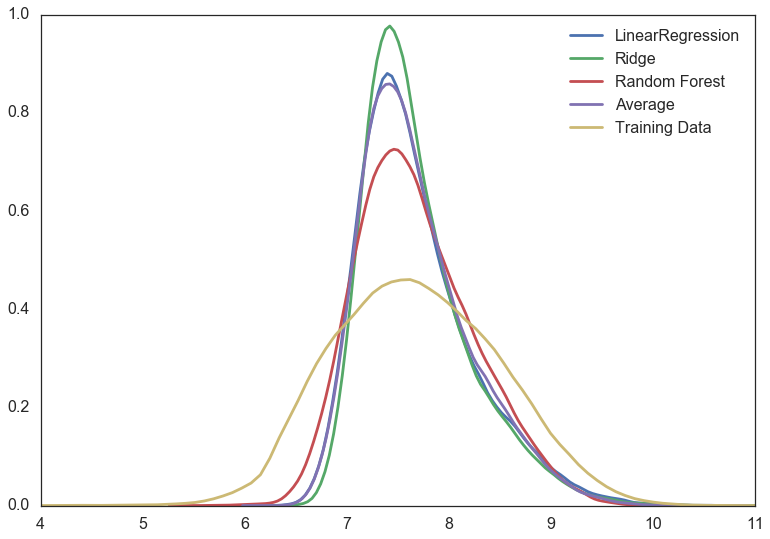

In [26]:
to_remove = list(['cont1','cont11','cont6','cat2','cat6','cat8','cat7','cat16'])

some_full = deepcopy(full)
for tr in to_remove:
    some_full = some_full.drop(tr,axis=1)
    
sns.set_context('poster')
sns.set_style('white')

m1 = LinearRegression(normalize=True)
m1.fit(some_full[0:len(train)],y)
pred1 = m1.predict(some_full[len(train):])
sns.distplot(pred1,label='LinearRegression',hist=False)

m2 = Ridge(alpha=0.2,normalize=True)
m2.fit(some_full[0:len(train)],y)
pred2 = m2.predict(some_full[len(train):])
sns.distplot(pred2,label='Ridge',hist=False)

m3 = RandomForestRegressor(n_estimators=160,max_features=80,min_samples_split=5)
m3.fit(some_full[0:len(train)],y)
pred3 = m3.predict(some_full[len(train):])
sns.distplot(pred3,label='Random Forest',hist=False)

sns.distplot(np.mean([pred1,pred2,pred3],axis=0),label='Average',hist=False)

sns.distplot(y,label='Training Data',hist=False)
plt.legend(loc='best')
plt.xlim([4,11])

### Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Try with all features:
some_full.loc[:,'cont10']=np.log1p(some_full.loc[:,'cont10'])

X_train, X_test, y_train, y_test = train_test_split(some_full[0:len(train)], y, test_size=.3)

nns = np.arange(5,20,1)
maes = []
for nn in nns:
    knn = KNeighborsRegressor(n_neighbors=nn,n_jobs=-1)
    knn.fit(X_train,y_train)
    maes.append(mean_absolute_error(np.expm1(y_test),np.expm1(knn.predict(X_test))))

    
plt.plot(nns,maes)

In [ ]:
model = RandomForestRegressor(n_estimators=160,max_features=80,min_samples_split=5)
x = some_full[0:len(train)]
model.fit(x,y)

test_dataset = some_full[len(train):]
submission.iloc[:, 1] = np.exp(model.predict(test_dataset))
submission.to_csv(loc+'random_forest5.csv', index=None)

fig,ax = plt.subplots()
sns.distplot(model.predict(test_dataset),ax=ax,label='Prediction - Test')
sns.distplot(y,hist=False,ax=ax,label='Loss - Training')
plt.legend()